<a href="https://colab.research.google.com/github/Freesoul-tech/Louis-Mahobe/blob/main/FOREcasingHP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FORECAST HOUSE PRICES
"data_description.txt"
"sample_submission.csv"
"test.csv"
"train.csv"

In [1]:
import pandas as pd

try:
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    df_submission = pd.read_csv('sample_submission.csv')
    with open('data_description.txt', 'r') as file:
        data_description = file.read()
    print("Files loaded successfully.")
except FileNotFoundError:
    print("One or more files not found.")
    data_description = None
except pd.errors.EmptyDataError:
    print('One or more CSV files are empty.')
    data_description = None
except Exception as e:
    print(f"An error occurred: {e}")
    data_description = None

Files loaded successfully.


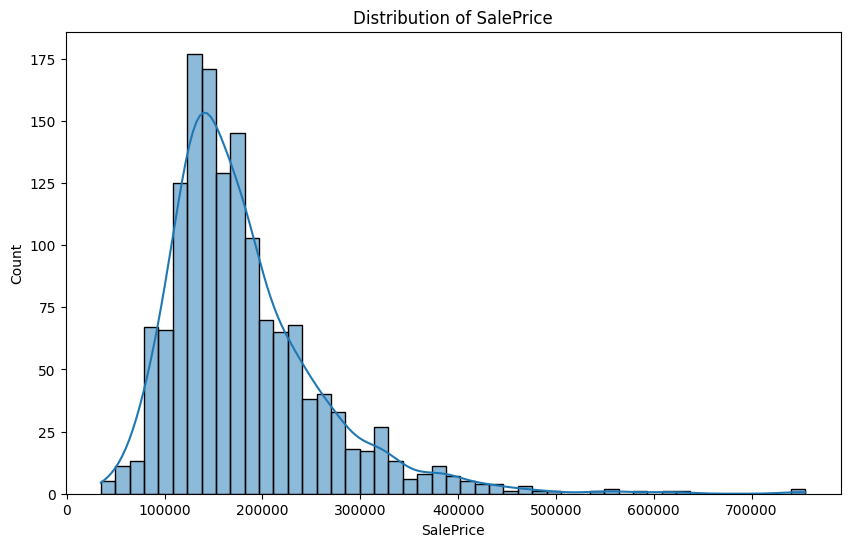

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
Misc

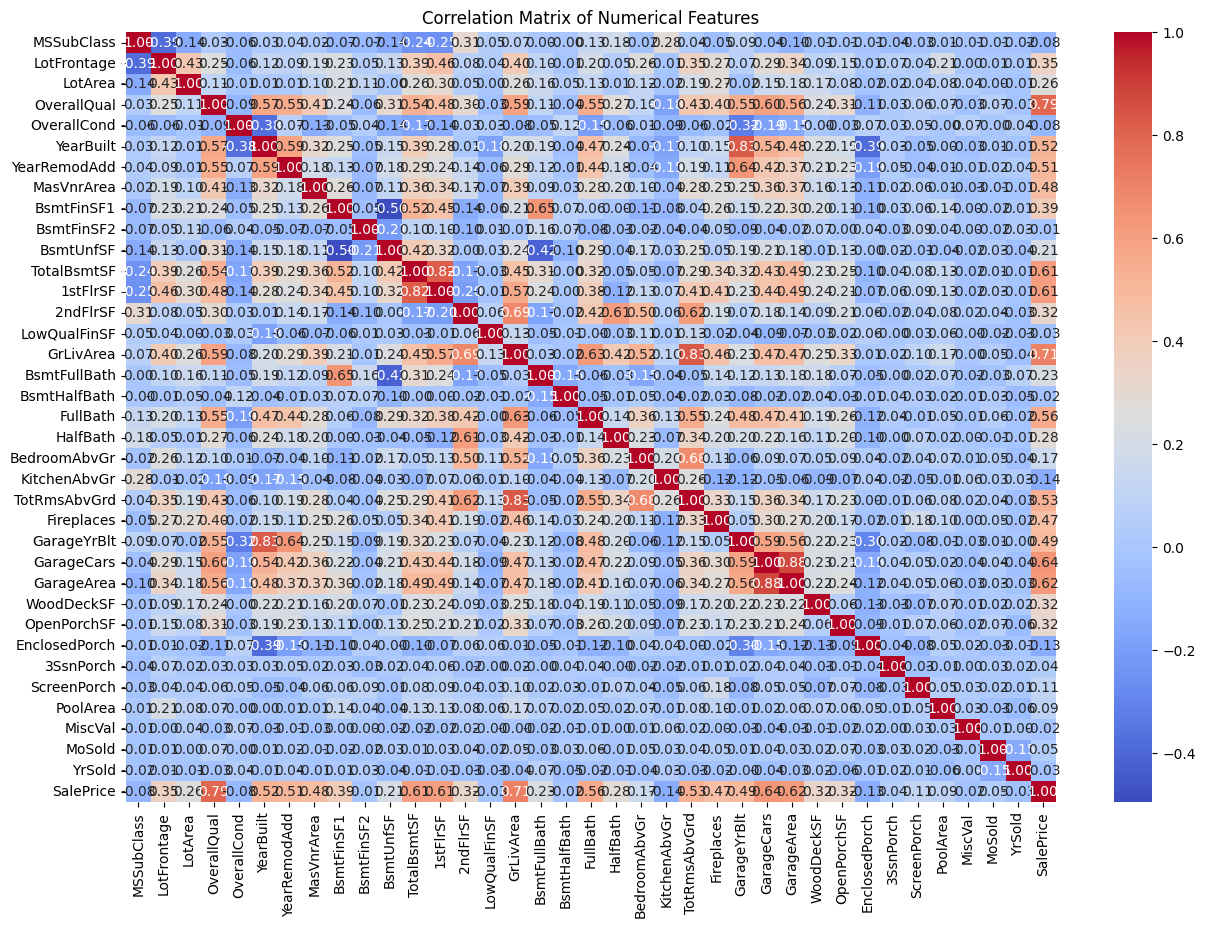

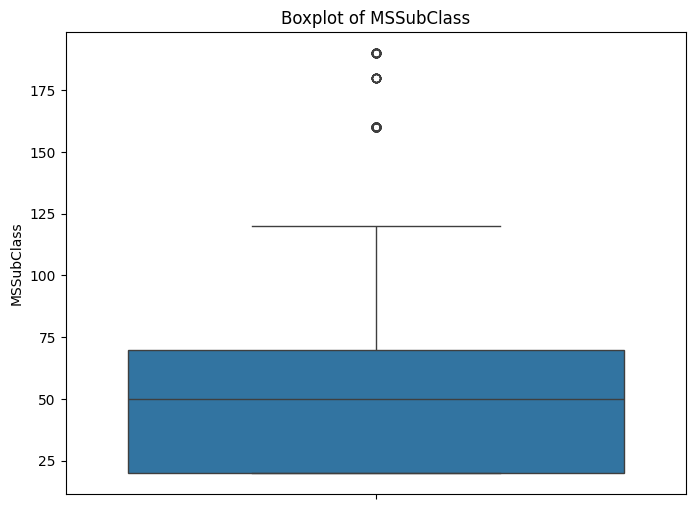

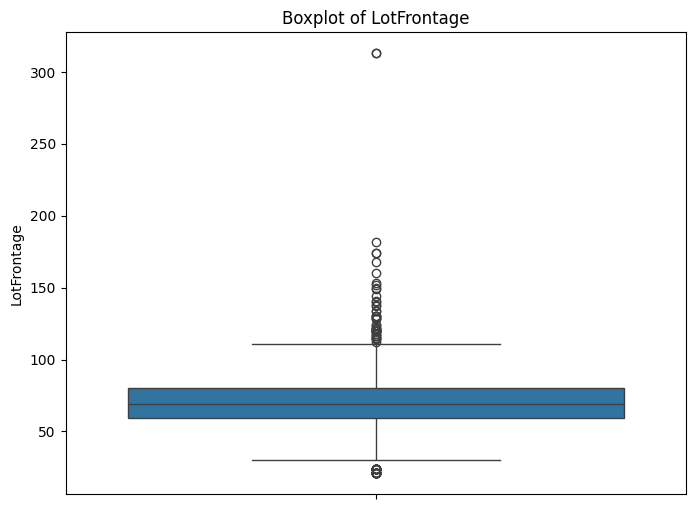

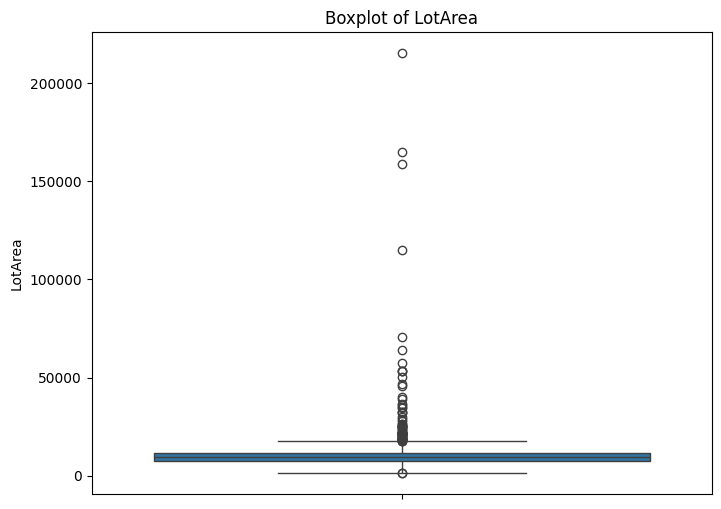

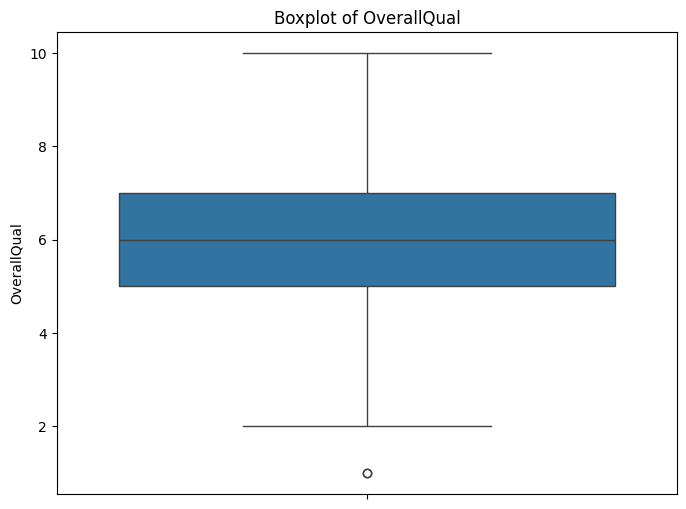

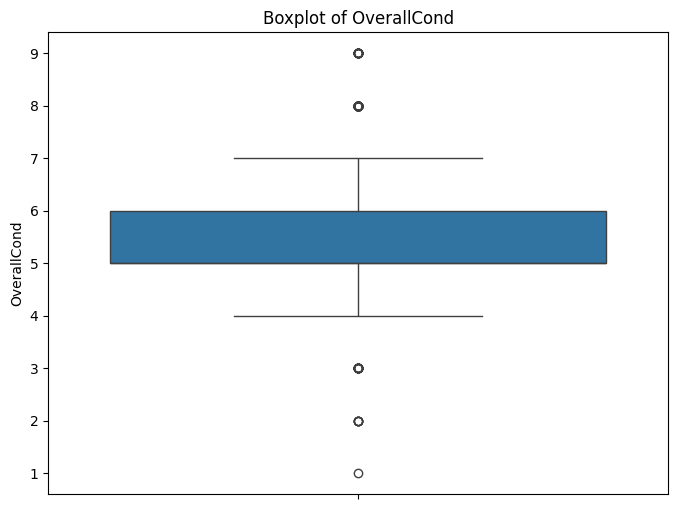

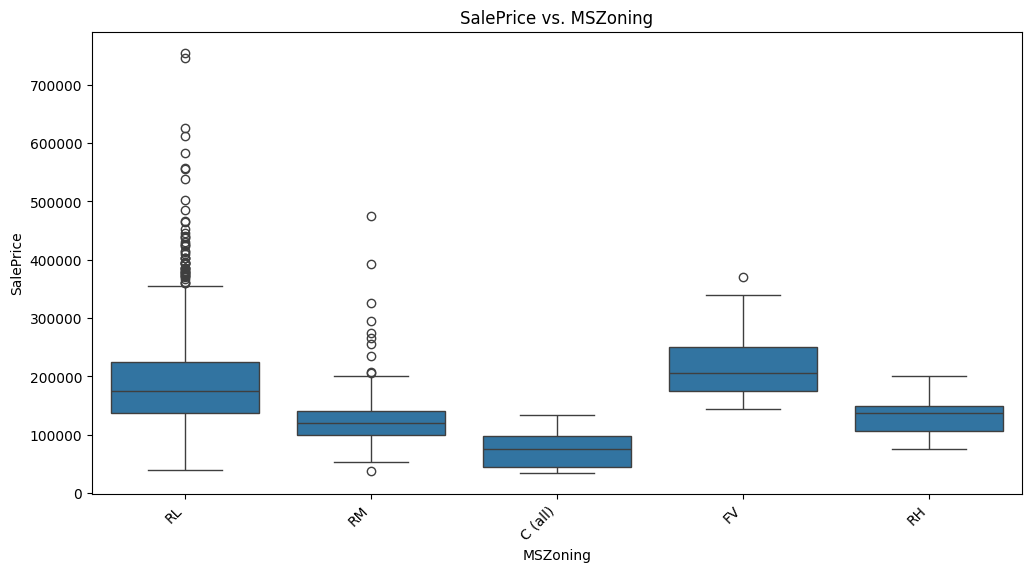

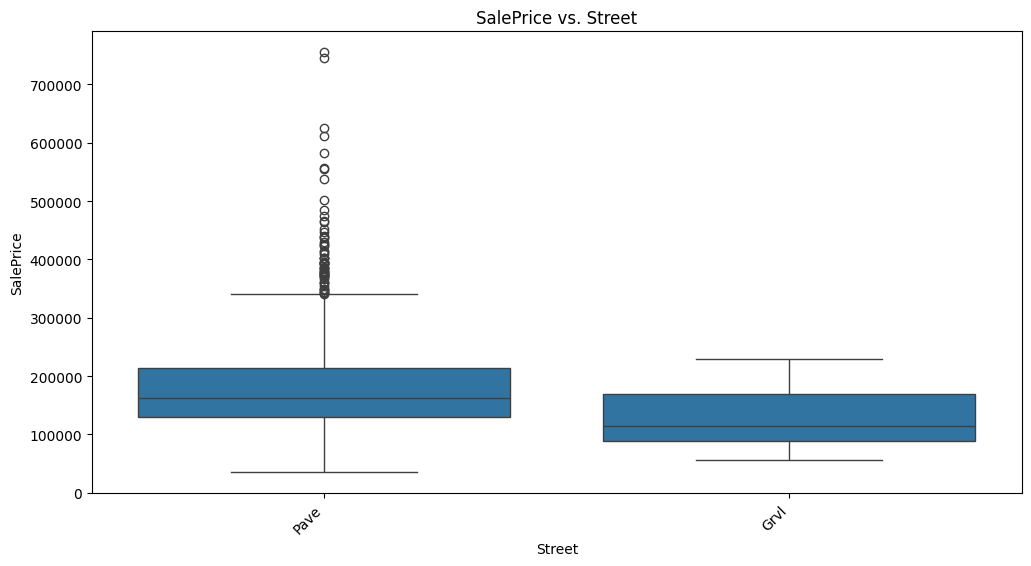

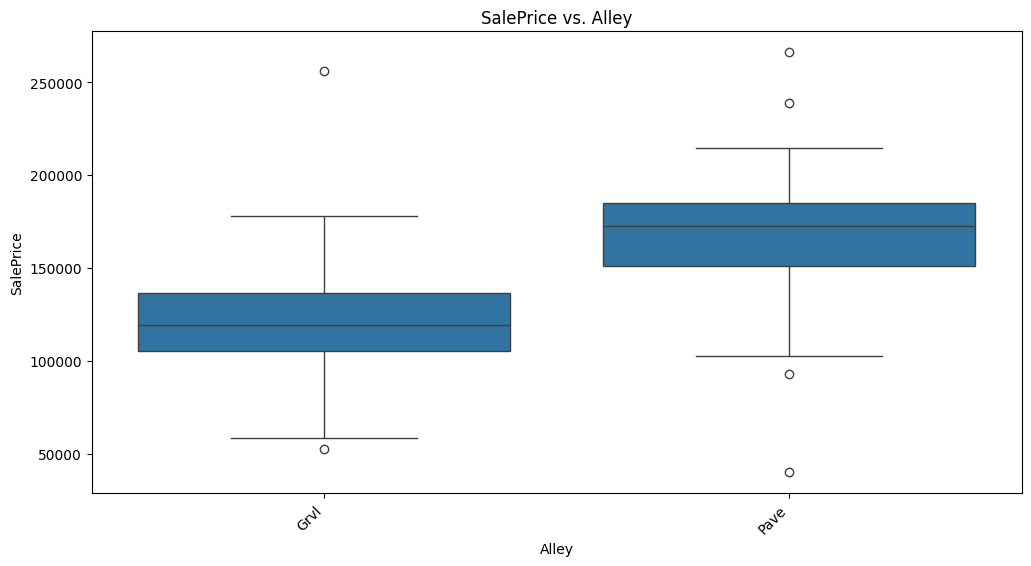

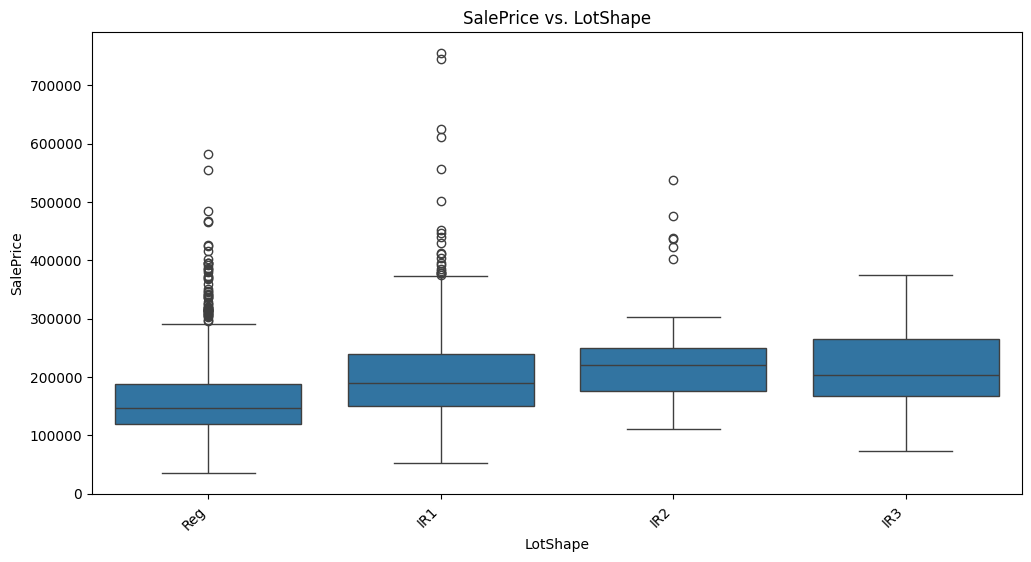

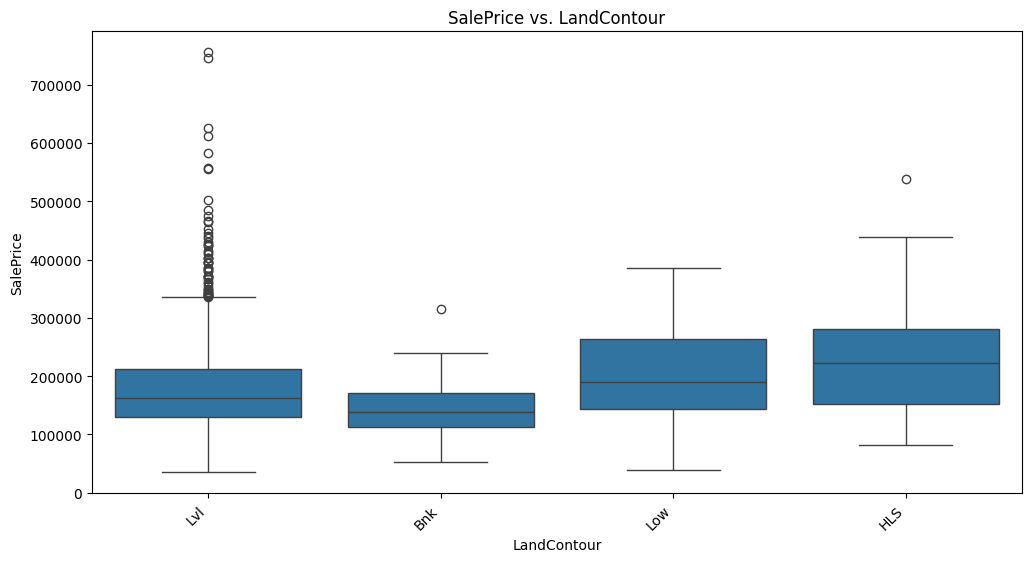

Observations:
The target variable 'SalePrice' appears to be right-skewed.
Highly correlated features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
Highly negatively correlated features with SalePrice:
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
Outliers detected:
Some numerical features like 'GrLivArea' and 'TotalBsmtSF' have outliers.
Categorical features with significant influence on SalePrice: (Visualized above)
Further inspection of the data_description.txt file is recommended.


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Analyze 'SalePrice' distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

print(df_train['SalePrice'].describe())

# 2. Analyze numerical features
numerical_features = df_train.select_dtypes(include=np.number).columns.drop('Id')
correlation_matrix = df_train[numerical_features].corr()['SalePrice']
print(correlation_matrix.sort_values(ascending=False))

plt.figure(figsize=(15, 10))
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

for col in numerical_features[:5]:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df_train[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


categorical_features = df_train.select_dtypes(exclude=np.number).columns

for col in categorical_features[:5]:
    if col != 'Id':
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df_train[col], y=df_train['SalePrice'])
        plt.title(f'SalePrice vs. {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


print("Observations:")
print("The target variable 'SalePrice' appears to be right-skewed.")
print("Highly correlated features with SalePrice:")
print(correlation_matrix.sort_values(ascending=False).head(10))
print("Highly negatively correlated features with SalePrice:")
print(correlation_matrix.sort_values(ascending=False).tail(10))
print("Outliers detected:")
print("Some numerical features like 'GrLivArea' and 'TotalBsmtSF' have outliers.")
print("Categorical features with significant influence on SalePrice: (Visualized above)") # observation on relationship with categorical features
# Manually observe the box plots above to identify potential influences of categorical features
print("Further inspection of the data_description.txt file is recommended.") # manual inspection

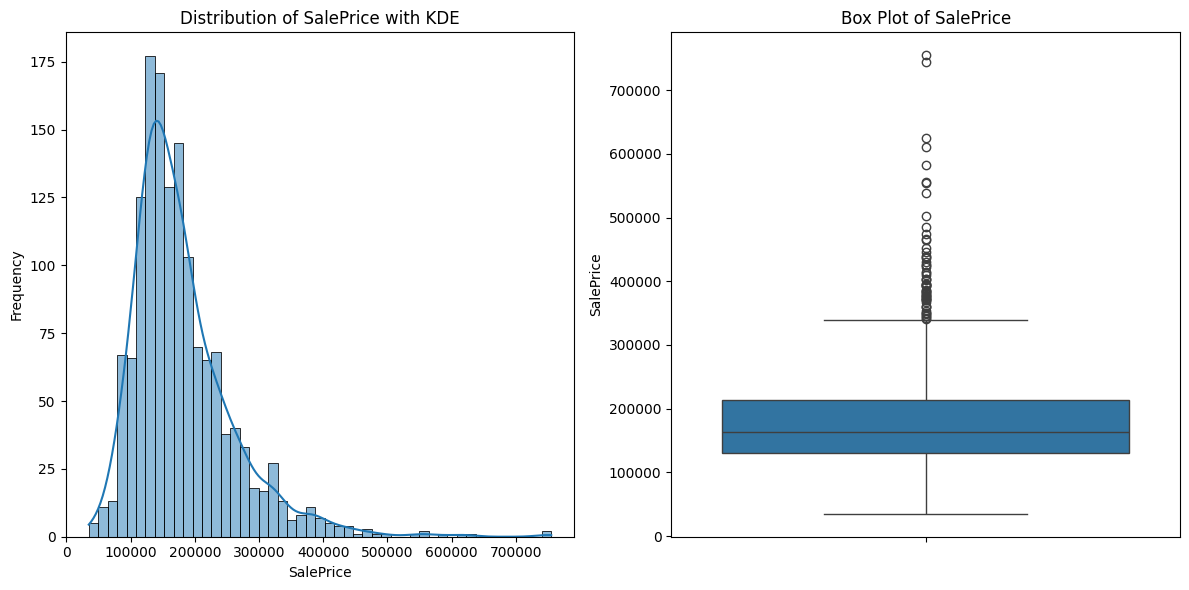

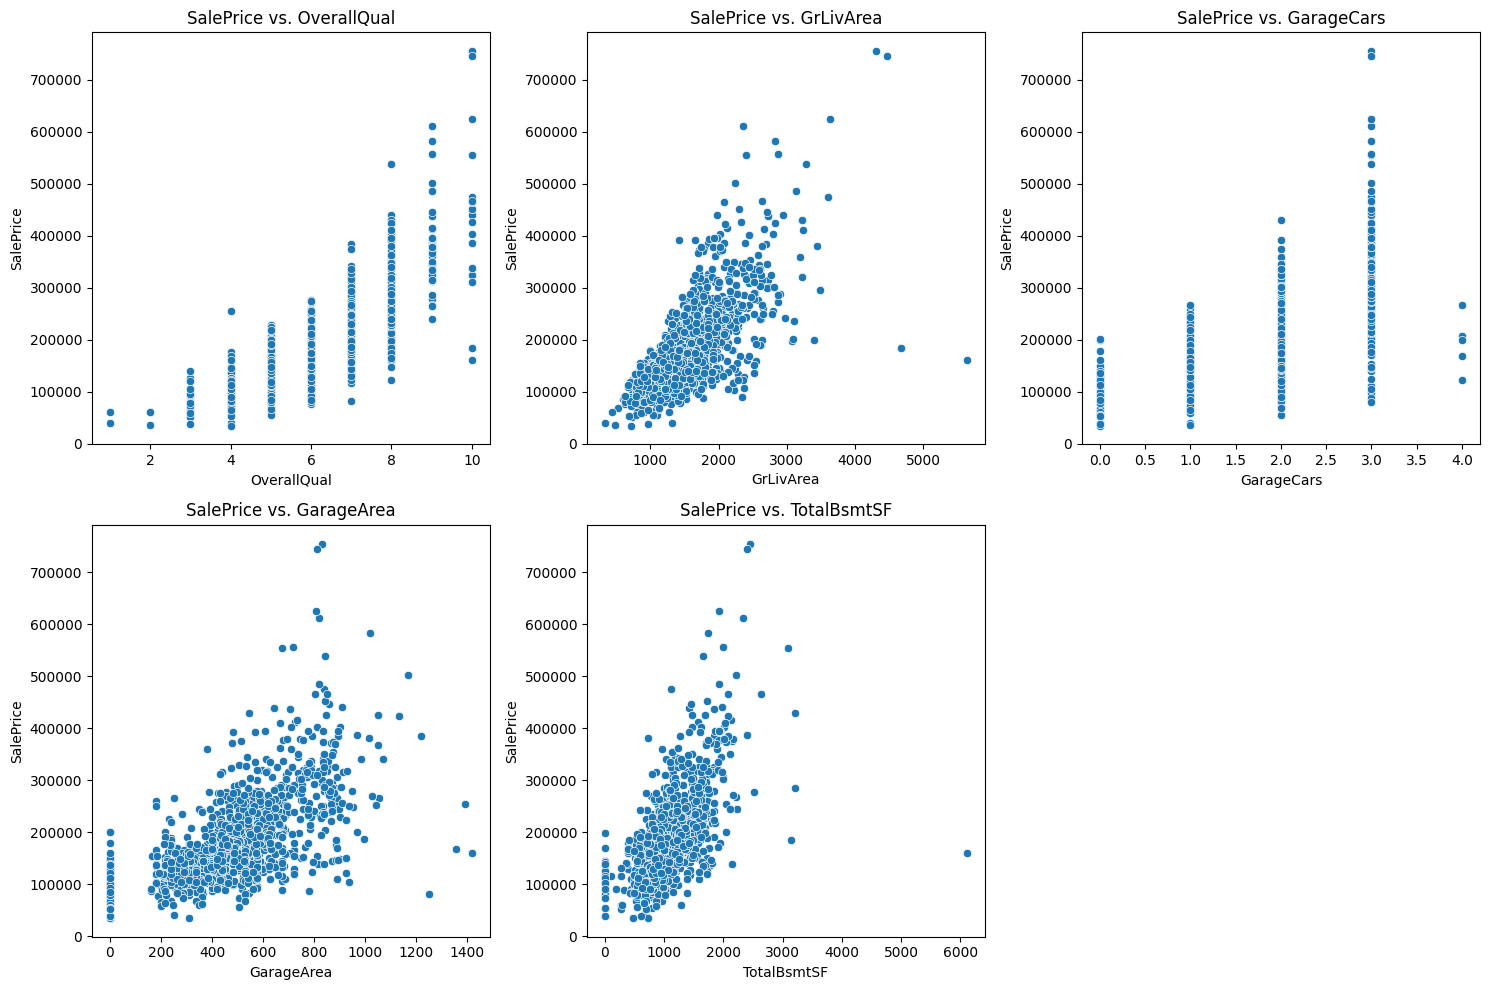

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Target Variable Distribution: Histogram and Box plot of 'SalePrice'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_train['SalePrice'], kde=True)
plt.title('Distribution of SalePrice with KDE')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_train['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# 2. Scatter plots of 'SalePrice' against highly correlated numerical features
# Based on previous exploration, using features with high correlation
numerical_features_to_plot = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=df_train[col], y=df_train['SalePrice'])
    plt.title(f'SalePrice vs. {col}')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

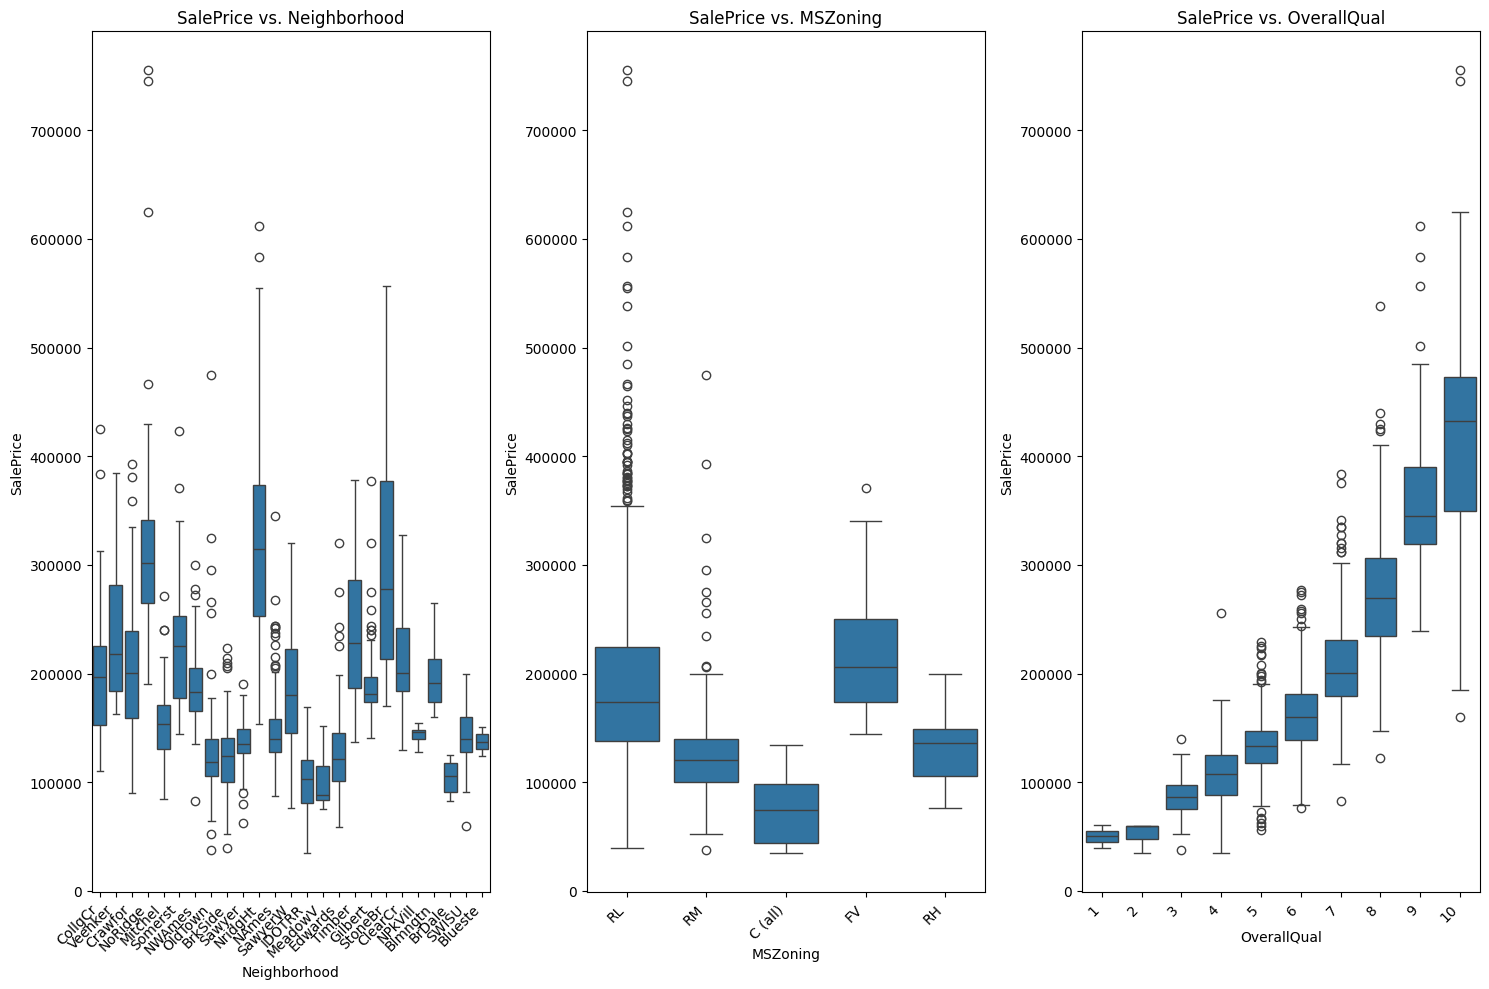

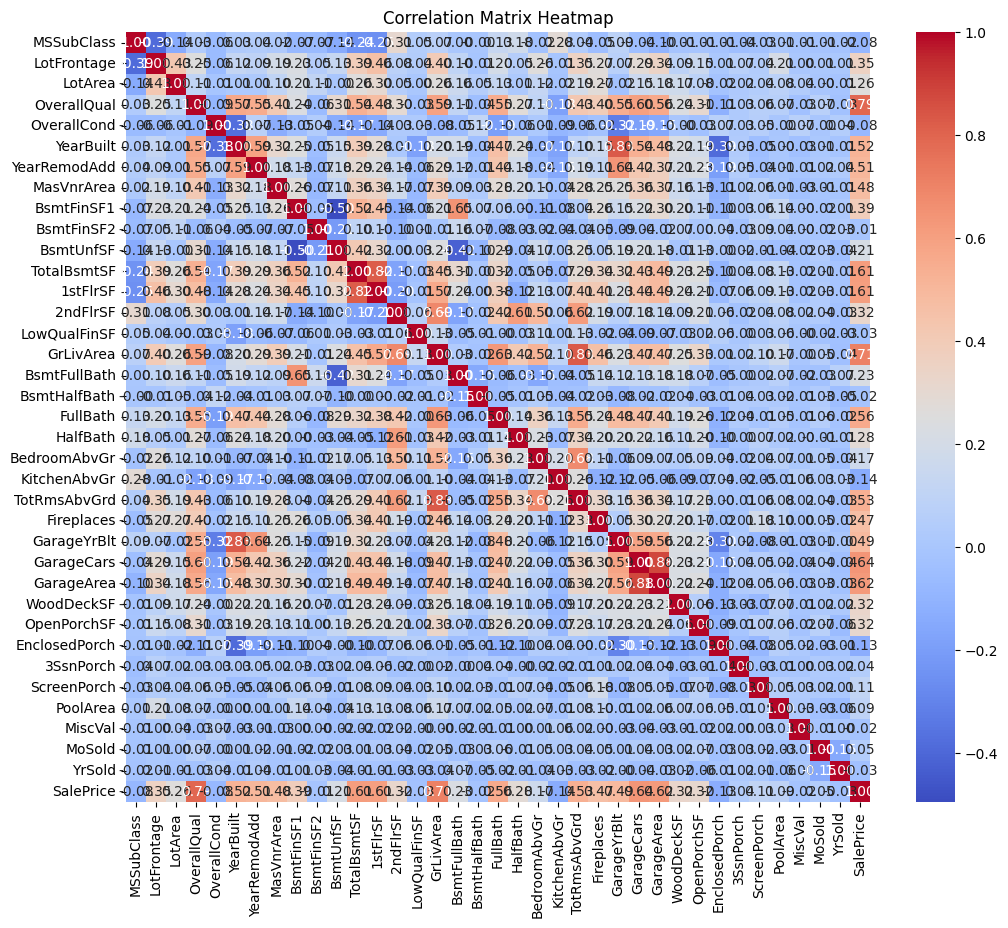

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Categorical Feature Analysis: Box plots of 'SalePrice' vs. categorical features
categorical_features_to_plot = ['Neighborhood', 'MSZoning', 'OverallQual']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(1, len(categorical_features_to_plot), i + 1)
    sns.boxplot(x=df_train[col], y=df_train['SalePrice'])
    plt.title(f'SalePrice vs. {col}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# 4. Correlation Heatmap
numerical_features = df_train.select_dtypes(include=np.number).columns.drop('Id')
plt.figure(figsize=(12, 10))
sns.heatmap(df_train[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

**Reasoning**:
Visualize the missing values in the dataset as per instruction 5.



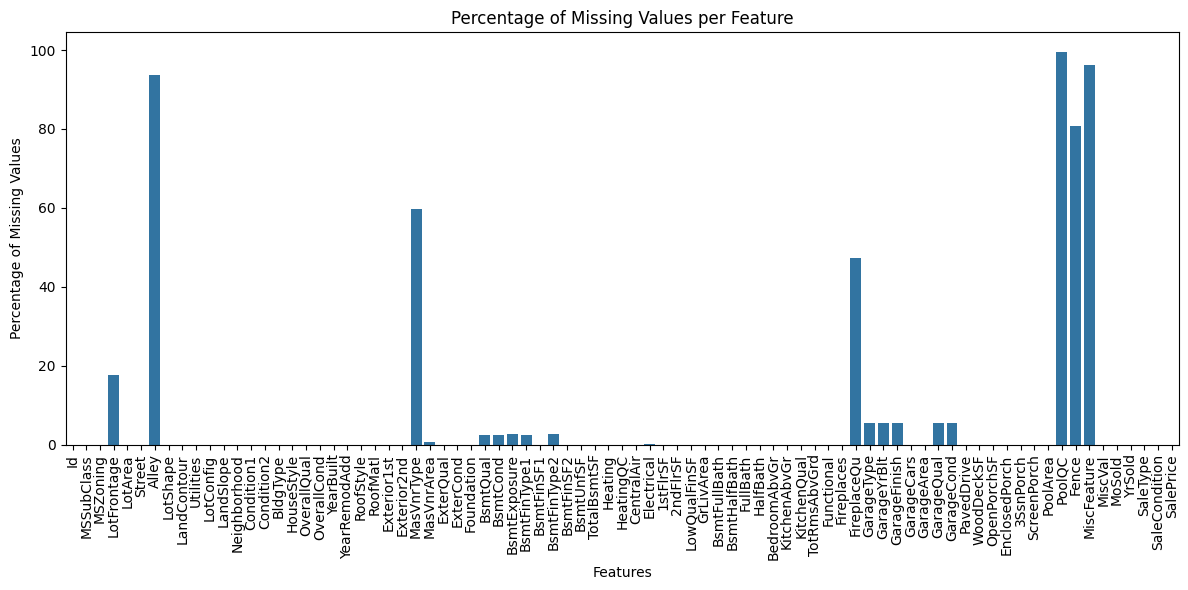

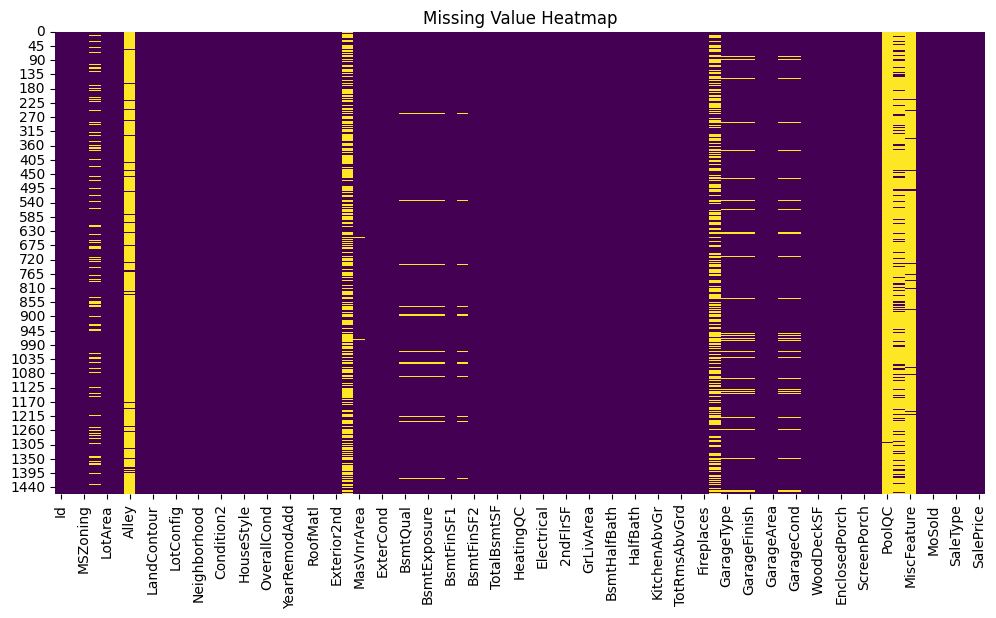

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 5. Missing Value Analysis
missing_percentages = df_train.isnull().sum() / len(df_train) * 100
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values per Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.tight_layout()
plt.show()

# Create a heatmap of missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

Mean Squared Error (MSE): 3418946311.18
Root Mean Squared Error (RMSE): 58471.76
R-squared (R2): 0.55


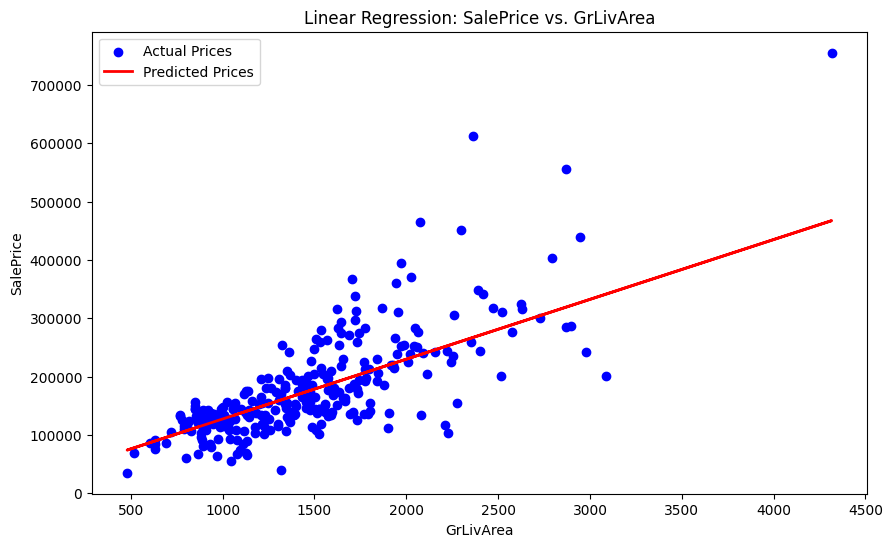

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

feature = 'GrLivArea'
target = 'SalePrice'


df_cleaned = df_train.dropna(subset=[feature, target])

X = df_cleaned[[feature]]
y = df_cleaned[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: SalePrice vs. GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

Training Linear Regression...
Linear Regression - MSE: 3418946311.18, RMSE: 58471.76, R2: 0.55
Training SVM...
SVM - MSE: 7844411967.08, RMSE: 88568.69, R2: -0.02
Training Decision Tree...
Decision Tree - MSE: 4830428765.72, RMSE: 69501.29, R2: 0.37
Training Random Forest...
Random Forest - MSE: 4031743201.26, RMSE: 63496.01, R2: 0.47

Model Comparison Table:
                            MSE          RMSE        R2
Linear Regression  3.418946e+09  58471.756526  0.554263
SVM                7.844412e+09  88568.685025 -0.022696
Decision Tree      4.830429e+09  69501.286072  0.370245
Random Forest      4.031743e+09  63496.009333  0.474371


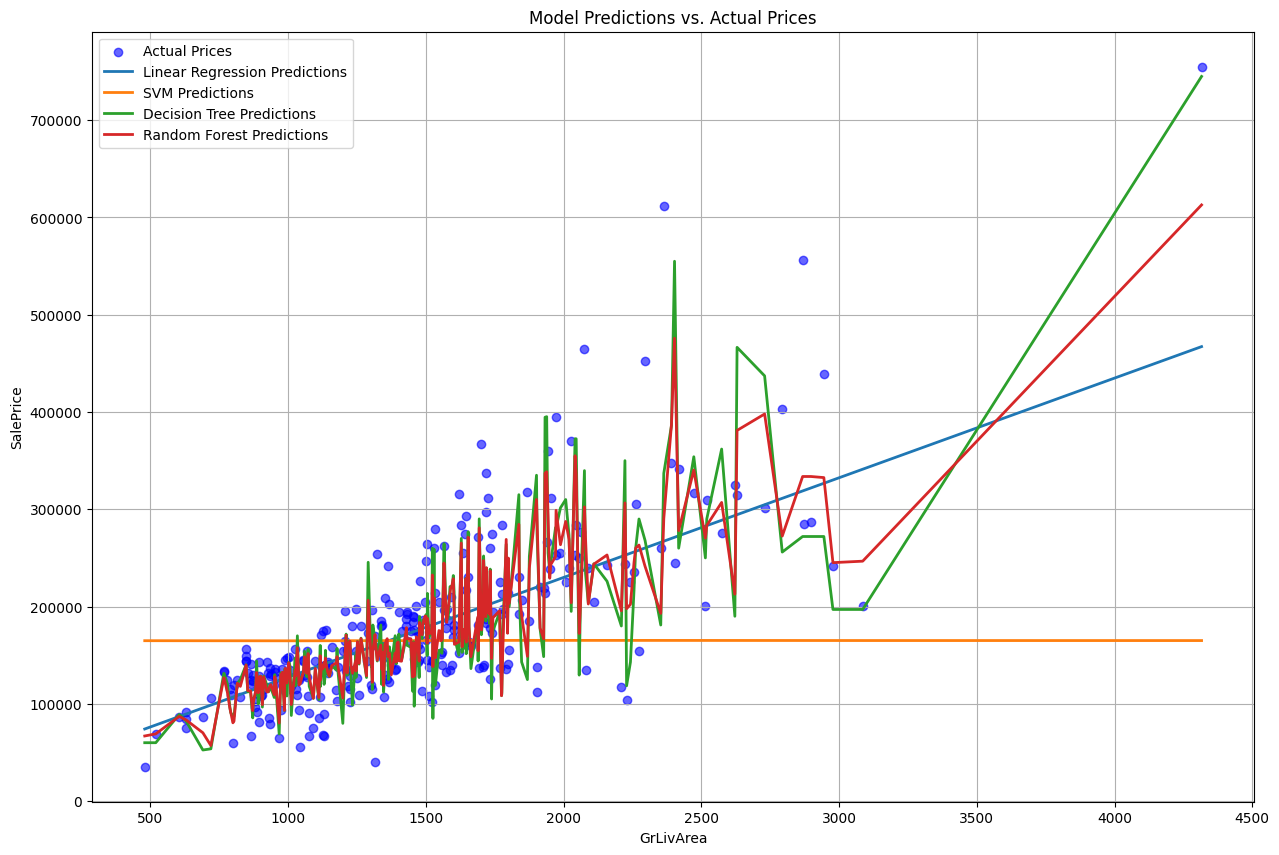


Observations on Model Performance:
Refer to the table and the figure above to compare model performance based on MSE, RMSE, and R2, and the visual fit of the predictions.


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation (same as previous block)
feature = 'GrLivArea'
target = 'SalePrice'
df_cleaned = df_train.dropna(subset=[feature, target])
X = df_cleaned[[feature]]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

results = {}
predictions = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'RMSE': rmse, 'R2': r2}
    print(f"{name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

# Create a comparison table
results_df = pd.DataFrame(results).T
print("\nModel Comparison Table:")
print(results_df)

# Visualize predictions
plt.figure(figsize=(15, 10))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)


X_test_sorted, y_test_sorted = zip(*sorted(zip(X_test[feature], y_test)))
X_test_sorted = np.array(X_test_sorted).reshape(-1, 1)

for name, y_pred in predictions.items():

    if name in ['Decision Tree', 'Random Forest']:
        y_pred_sorted = [y_pred for _, y_pred in sorted(zip(X_test[feature], y_pred))]
        plt.plot(X_test_sorted, y_pred_sorted, linewidth=2, label=f'{name} Predictions')
    else:
         y_pred_for_sorted_x = [y_pred[list(X_test[feature]).index(x[0])] for x in X_test_sorted]
         plt.plot(X_test_sorted, y_pred_for_sorted_x, linewidth=2, label=f'{name} Predictions')


plt.title('Model Predictions vs. Actual Prices')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()
plt.grid(True)
plt.show()

print("\nObservations on Model Performance:")
print("Refer to the table and the figure above to compare model performance based on MSE, RMSE, and R2, and the visual fit of the predictions.")